# **UBER FARE PREDICTION**

##dataset

**Dataset**

train.csv - Input features and target fare_amount values for the training set (about 50k rows).

test.csv - Input features for the test set (about 10K rows). 

Our goal is to predict fare_amount for each row.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## Exploring data analysis

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
train_df=pd.read_csv(r"/content/drive/MyDrive/Internship/train.csv",nrows=10000)
#test_df=pd.read_csv(r"/content/drive/MyDrive/Internship/test.csv")
print (train_df.shape)
print (train_df.columns)
#print (test_df.shape)
#print (test_df.columns)

(10000, 8)
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                10000 non-null  object 
 1   fare_amount        10000 non-null  float64
 2   pickup_datetime    10000 non-null  object 
 3   pickup_longitude   10000 non-null  float64
 4   pickup_latitude    10000 non-null  float64
 5   dropoff_longitude  10000 non-null  float64
 6   dropoff_latitude   10000 non-null  float64
 7   passenger_count    10000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 625.1+ KB


Here we can see there are 8columns in which 6 numerics and 2 are object.

Lets change the type of pickup_datetime from object to DateTime


In [ ]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [ ]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
#Eliminate rows where the pickup and drop location points are same

train_df=train_df[np.logical_and(train_df['pickup_longitude'] != train_df['dropoff_longitude'],
                                     train_df['pickup_latitude'] != train_df['dropoff_latitude'])]

In [ ]:
train_df.shape

(9718, 8)

In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000
mean,11.227631,-73.839094,40.676157,-73.854353,40.648201,1.647767
std,9.324101,3.661502,4.902851,3.488590,3.212462,1.273914
min,-2.900000,-74.438233,-74.006893,-74.185996,-73.994392,0.000000
25%,6.000000,-73.992255,40.736006,-73.991290,40.736635,1.000000
50%,8.500000,-73.982090,40.753391,-73.980501,40.754476,1.000000
75%,12.500000,-73.968285,40.768042,-73.965388,40.768596,2.000000
max,165.000000,40.766125,401.083332,40.802437,41.366138,6.000000


Here replace 0 with NA in the variable and convert the data wherever required for further operation


In [ ]:
train_df['fare_amount']= train_df['fare_amount'].apply(pd.to_numeric, errors='coerce')
#coerce its implicit conversion of an instance of one type to another
train_df['fare_amount']= train_df['fare_amount'].replace({0:np.nan})
train_df['passenger_count']=train_df['passenger_count'].fillna(0)
train_df['passenger_count']= train_df['passenger_count'].astype(int)
train_df['passenger_count']=train_df['passenger_count'].replace({0: np.nan})
train_df['pickup_longitude']= train_df['pickup_longitude'].replace({0:np.nan})
train_df['pickup_latitude']= train_df['pickup_latitude'].replace({0:np.nan})
train_df['dropoff_longitude']= train_df['dropoff_longitude'].replace({0:np.nan})
train_df['dropoff_latitude']= train_df['dropoff_latitude'].replace({0:np.nan})

Here we can see there are  null values in passanger_count,pickup_latitude, pickup_logitude, drop_off latitude and longitude. As removing some rows from our huge dataset will not affect our analysis so, lets remove the rows having null values 


In [ ]:
#calculate missing values

missing_val = pd.DataFrame(train_df.isnull().sum())
#print(missing_val)

#Reset index
missing_val = missing_val.reset_index()
#print(missing_val)

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'count'})
#print(missing_val)

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['count']/len(train_df)*100)
#print(missing_val)

#sort in descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print(missing_val)

           Variables  count  Missing_percentage
0    passenger_count     37            0.380737
1   pickup_longitude      6            0.061741
2    pickup_latitude      6            0.061741
3  dropoff_longitude      3            0.030871
4   dropoff_latitude      3            0.030871
5                key      0            0.000000
6        fare_amount      0            0.000000
7    pickup_datetime      0            0.000000


In [ ]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
train_df.shape

(9672, 8)

 **OUTLIER ANALYSIS**

Here first thing which we can see is minimum value of fare is negative which is -2 which is not the valid value, so we need to remove the fare which are negative values.


In [ ]:
# irregular fare_amount are converted to NA 

train_df.loc[train_df['fare_amount']<0 , 'fare_amount']=np.nan
train_df.loc[train_df['fare_amount'] > 30, 'fare_amount']=np.nan
train_df=train_df.dropna()

In [ ]:
train_df.shape

(9189, 8)

Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [ ]:
#irregular passenger counts or those wgich are greater then 8 convertet to NaN
train_df.loc[train_df['passenger_count'] > 8,'passenger_count'] = np.nan

It calculates the distance and makes a boundary till where car should travel 

In [ ]:
#save numeric data names
coutliers = [ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for list in coutliers:
    #Detect and replace with NA
    #Extract quartiles
    q75, q25 = np.percentile(train_df[list], [75 ,25])

    #Calculate IQR
    iqr = q75 - q25
   
    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    train_df.loc[train_df[list] < minimum,list] = np.nan
    train_df.loc[train_df[list] > maximum,list] = np.nan

    # #Calculate missing value
    missing_val = pd.DataFrame(train_df.isnull().sum())

In [ ]:
#As Mean is the best method, we impute missing values/ in this case outlier values with mean

train_df['pickup_longitude'] = train_df['pickup_longitude'].fillna(train_df['pickup_longitude'].mean())
train_df['pickup_latitude'] = train_df['pickup_latitude'].fillna(train_df['pickup_latitude'].mean())
train_df['dropoff_longitude'] = train_df['dropoff_longitude'].fillna(train_df['dropoff_longitude'].mean())
train_df['dropoff_latitude'] = train_df['dropoff_latitude'].fillna(train_df['dropoff_latitude'].mean())

#imputed with mode for categorical variables
train_df['passenger_count'] = train_df['passenger_count'].fillna(int(train_df['passenger_count'].mode()))

In [ ]:
#convert the data type of categorical variable passenger count
#train_df['passenger_count']=train_df['passenger_count'].astype('int')
train_df['passenger_count']=train_df['passenger_count'].astype('category')
#category datatype in pandas is a hybrid data type. it looks and behave like a string in many instance but internally is represented by an array of integer

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9189 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9189 non-null   object             
 1   fare_amount        9189 non-null   float64            
 2   pickup_datetime    9189 non-null   datetime64[ns, UTC]
 3   pickup_longitude   9189 non-null   float64            
 4   pickup_latitude    9189 non-null   float64            
 5   dropoff_longitude  9189 non-null   float64            
 6   dropoff_latitude   9189 non-null   float64            
 7   passenger_count    9189 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(5), object(1)
memory usage: 583.5+ KB


##Visualize the parametric distribution of a dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


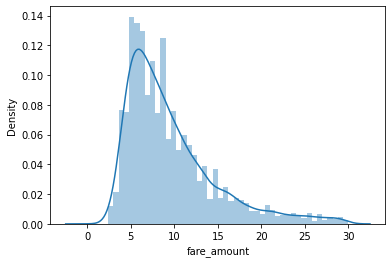

In [ ]:
sns.distplot(train_df['fare_amount'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


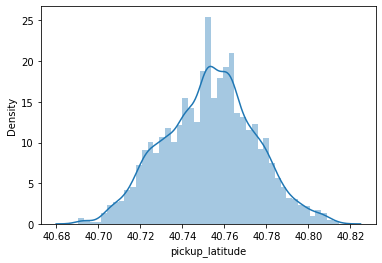

In [ ]:
sns.distplot(train_df['pickup_latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


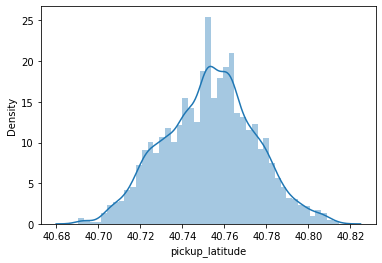

In [ ]:
sns.distplot(train_df['pickup_latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


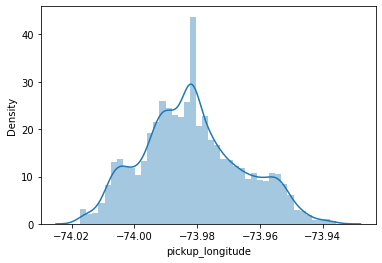

In [ ]:
sns.distplot(train_df['pickup_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


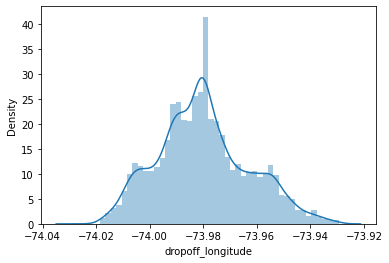

In [ ]:
sns.distplot(train_df['dropoff_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


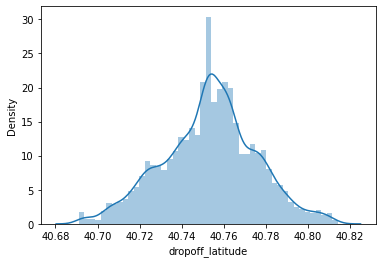

In [ ]:
sns.distplot(train_df['dropoff_latitude'])

##lets create some extra features which will take care of all these things


In [ ]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [ ]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.981706,40.721319,-73.980109,40.712278,1.0,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9,7,Tuesday,3,2010


In [ ]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [ ]:
train_df.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9189 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   fare_amount        9189 non-null   float64 
 1   pickup_longitude   9189 non-null   float64 
 2   pickup_latitude    9189 non-null   float64 
 3   dropoff_longitude  9189 non-null   float64 
 4   dropoff_latitude   9189 non-null   float64 
 5   passenger_count    9189 non-null   category
 6   day                9189 non-null   int64   
 7   hour               9189 non-null   int64   
 8   weekday            9189 non-null   int64   
 9   month              9189 non-null   int64   
 10  year               9189 non-null   int64   
dtypes: category(1), float64(5), int64(5)
memory usage: 798.9 KB


##**Linear correlation**
Next, let's compute the correlation matrix to identify those features that are most correlated with the target and those that are most correlated to each other. The former type corresponds to the best predictors and the latter type those that introduce multicollinearity. For two variables,  x  and  y , the formula is as follows

∑i,j(xi−x¯))(yj−y¯)/σ iσ j 

We do this just after separating a test data set, and use the train data set only, so as not to involve the test data set in any feature selection procedures.

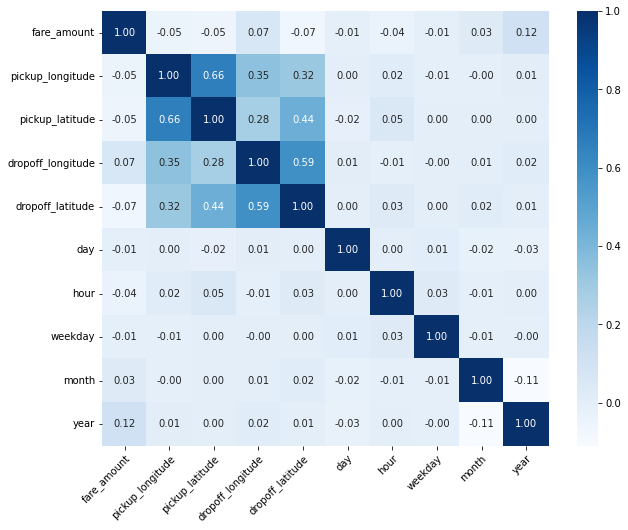

In [ ]:
def corr_heatmap(df):
    corr_data = df.corr()
    fig, ax = plt.subplots(figsize=(10,8))
    # Add title
    #plt.title(title, fontsize=12)
    # Heatmap showing the amount of genomes with the same MIC for each MIC, by antibiotic
    sns.heatmap(corr_data, annot=corr_data, cmap='Blues', cbar=True, fmt='.2f')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    plt.show()
    
corr_heatmap(train_df)


##lets divide the data set into train and validation test set


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=train_df.drop("fare_amount", axis=1)
y=train_df['fare_amount']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
4998,-73.952795,40.776642,-73.965320,40.759412,5.0,8,14,1,3,2010
7162,-74.002020,40.729952,-74.005832,40.740300,1.0,8,20,4,5,2014
7562,-73.976402,40.780825,-73.966033,40.804952,1.0,7,17,3,5,2014
1988,-73.997283,40.736589,-73.973796,40.760652,1.0,27,10,3,6,2012
371,-73.994118,40.751179,-73.975113,40.756458,1.0,21,9,4,5,2015


In [ ]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
8375,-73.965448,40.772086,-73.961774,40.777993,2.0,11,16,3,9,2013
4310,-73.980747,40.750243,-74.012541,40.701640,2.0,14,10,0,4,2013
5032,-73.982200,40.768200,-73.978800,40.763200,1.0,10,21,3,8,2011
5834,-73.958487,40.715139,-73.960283,40.698502,1.0,15,3,0,11,2009
2711,-73.982524,40.735653,-73.988734,40.748532,1.0,14,17,5,1,2011


## ***DECISION TREE REGRESSOR***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
# Decision tree for regression
fit_DT = DecisionTreeRegressor(random_state=0)
fit_DT.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
#Apply model on test data
predictions_DT = fit_DT.predict(x_test)

Calculate root mean square error. RMSE is standard deviation of prediction error

In [ ]:
dtr_rmse=np.sqrt(mean_squared_error(predictions_DT, y_test))
print("RMSE value for decision tree regression is ",dtr_rmse)

RMSE value for decision tree regression is  4.700253355984775


MAPE- Mean absolute percentage error is a statistical measure to define the accuracy of a machine learning algorithm.It is considered as a loss function to define the error.

Mape=1/n∑(Actual-Estimated)/Actual



In [ ]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = (np.mean(np.abs((y_true - y_pred) / y_true)))
    return mape

In [ ]:
DT_mape=MAPE(x_test.iloc[:,0], predictions_DT)

In [ ]:
DT_mape

1.12880203941039

## ***LINEAR REGRESSION***

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictedvalues = lrmodel.predict(x_test)

In [ ]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)


RMSE value for Linear regression is 5.029844743227887


In [ ]:
#Import libraries for LR
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Train the model using the training sets
model = sm.OLS(x_train.iloc[:, 0].astype(float), x_train.iloc[:, 1:12].astype(float)).fit()

In [ ]:
#Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       pickup_longitude   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.842e+10
Date:                Wed, 12 Jan 2022   Prob (F-statistic):                        0.00
Time:                        04:17:01   Log-Likelihood:                          20168.
No. Observations:                7351   AIC:                                 -4.032e+04
Df Residuals:                    7342   BIC:                                 -4.026e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_latitude       0.3700      0.009     40.374      0.000       0.352       0.388
dropoff_longitude     0.9258      0.004    206.202      0.000       0.917       0.935
dropoff_latitude     -0.4627      0.008    -55.576      0.000      -0.479      -0.446
passenger_count   -6.227e-05      0.000     -0.439      0.661      -0.000       0.000
day                7.732e-06    2.1e-05      0.369      0.712   -3.34e-05    4.88e-05
hour               6.272e-05   2.79e-05      2.245      0.025    7.95e-06       0.000
weekday           -7.087e-05    9.1e-05     -0.779      0.436      -0.000       0.000
month             -4.607e-05   5.34e-05     -0.862      0.389      -0.000    5.87e-05
year                 -0.0009   9.68e-05     -8.798      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      482.150   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1031.944
Skew:                          -0.437   Prob(JB):                    8.25e-225
Kurtosis:                       4.615   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# make the predictions by the model
predictions_LR = model.predict(x_test.iloc[:,1:12])

In [ ]:
#Calculate MAPE
LR_mape=MAPE(x_test.iloc[:,0], predictions_LR)

In [ ]:
LR_mape

0.00015167232925365385

## ***RANDOM FOREST REGRESSION***

In [ ]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [ ]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [ ]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  3.049356294644267


 Random Forest Regressor is given a good value, so we use it as final model

# **PREDICTION ON ORIGINAL TEST DATA**

In [ ]:
#haversine function

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
   
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [ ]:
test_df=pd.read_csv(r"/content/drive/MyDrive/Internship/test.csv")

In [ ]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
#create Dist variable
test_df['dist'] = haversine( test_df['pickup_latitude'], test_df['pickup_longitude'],
                 test_df['dropoff_latitude'], test_df['dropoff_longitude'])

test_df['fare_amount']=0
test_df['passenger_count']=test_df['passenger_count'].astype('category')

In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,fare_amount
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,0
...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,2.124874,0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,3.270969,0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,19.183941,0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,8.343486,0


In [ ]:
# Build model on the entire Train data
RF_model = RandomForestRegressor(n_estimators = 10).fit(train_df.iloc[:, 1:7], train_df.iloc[:,0])

#predict value
test_df['fare_amount'] = RF_model.predict(test_df.iloc[:,2:8])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dist
Feature names seen at fit time, yet now missing:
- day

  warnings.warn(message, FutureWarning)


In [ ]:
test_df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist,fare_amount
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,9.04
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,8.72
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,5.62
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,7.64
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,14.81
